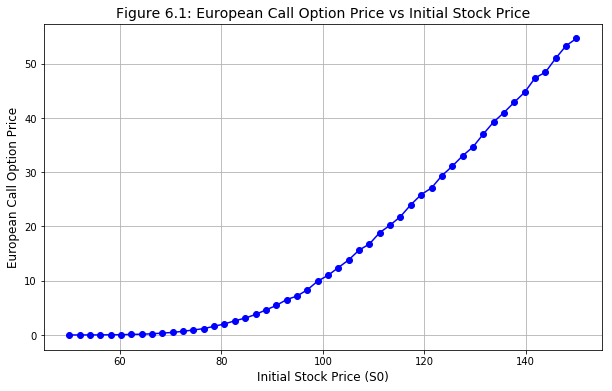

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_european_call(S0, K, T, r, sigma, num_simulations):
    dt = T  # Single time step (maturity)
    prices = np.zeros(num_simulations)  # Array to store payoffs

    for i in range(num_simulations):
        Z = np.random.normal(0, 1)  # Standard normal random variable
        ST = S0 * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)  # Stock price at maturity
        prices[i] = max(ST - K, 0)  # Payoff for call option

    call_price = np.exp(-r * T) * np.mean(prices)
    return call_price

# Parameters
K = 100
T = 1
r = 0.05
sigma = 0.2
num_simulations = 10000

# Vary initial stock price from 50 to 150 (for example)
S0_values = np.linspace(50, 150, 50)
call_prices = []

for S0 in S0_values:
    price = monte_carlo_european_call(S0, K, T, r, sigma, num_simulations)
    call_prices.append(price)

# Plot Option Price vs Initial Stock Price
plt.figure(figsize=(10, 6))
plt.plot(S0_values, call_prices, marker='o', linestyle='-', color='blue')
plt.xlabel("Initial Stock Price (S0)", fontsize=12)
plt.ylabel("European Call Option Price", fontsize=12)
plt.title("Figure 6.1: European Call Option Price vs Initial Stock Price", fontsize=14)
plt.grid(True)
plt.savefig(r'F:\GITHUB\computational-finance-models\chart\Figure 6.1 European Call Option Price vs Initial Stock Price.png')
plt.show()
